In [50]:
import eos
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import itertools

import matplotlib.pyplot as plt
import uproot

from math import sqrt
sqrt2 = sqrt(2)


In [51]:
analysis_args = {
    'priors': [
      { 'parameter': 'B->K^*::alpha^A0_0@BSZ2015', 'min':  0.20945, 'max':  0.47483,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^A0_1@BSZ2015', 'min': -2.13775, 'max': -0.15707,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^A0_2@BSZ2015', 'min': -6.53063, 'max': 11.27615,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^A1_0@BSZ2015', 'min':  0.19330, 'max':  0.38524,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^A1_1@BSZ2015', 'min': -0.18707, 'max':  1.10697,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^A1_2@BSZ2015', 'min': -2.48532, 'max':  4.93367,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^A12_1@BSZ2015', 'min': -1.15061, 'max':  2.25292,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^A12_2@BSZ2015', 'min': -9.71557, 'max': 10.87183,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^V_0@BSZ2015', 'min':  0.21932, 'max':  0.50628,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^V_1@BSZ2015', 'min': -1.93848, 'max': -0.24015,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^V_2@BSZ2015', 'min': -7.37332, 'max': 12.97916,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T1_0@BSZ2015', 'min':  0.21448, 'max':  0.42400,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T1_1@BSZ2015', 'min': -1.64874, 'max': -0.27503,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T1_2@BSZ2015', 'min': -4.25767, 'max':  8.44379,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T2_1@BSZ2015', 'min': -0.30810, 'max':  1.49458,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T2_2@BSZ2015', 'min': -3.25052, 'max':  6.60961,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T23_0@BSZ2015', 'min':  0.44892, 'max':  0.79355,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T23_1@BSZ2015', 'min': -0.58572, 'max':  2.53233,  'type': 'uniform'},
      { 'parameter': 'B->K^*::alpha^T23_2@BSZ2015', 'min': -10.28053, 'max': 13.92309,  'type': 'uniform'},
    ],
    'likelihood': [
        'B->K^*::FormFactors[A_0,A_1,A_2,V,T_1,T_2,T_23]@GRvDV:2021A',
        'B->K^*::V+A_0+A_1+A_12@HLMW:2015A',
        'B->K^*::T_1+T_2+T_23@HLMW:2015A',
    ]
}
analysis = eos.Analysis(**analysis_args)

In [52]:
## define our q2 bins
Fl_q2values = np.ndarray((5,), buffer=np.array([0., 1,2,4.3, 6., 8.68]),
          offset=np.float_().itemsize,
           dtype=float) # offset = 1*itemsize, i.e. skip first element


In [53]:
## now get the sampling for each bin separately
Fl_obs = [eos.Observable.make(
            'B->K^*ll::F_L', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]
len(Fl_obs)

4

In [54]:
## now include new observables
## eos.Observables().insert(name, latex, unit, options, expression)
# B->K^*ll::S_3 ## but there is also a B->K^*ll::S_3_LHCB

eos.Observables().insert('B->K^*ll::P1', 'P1', eos.Unit.Unity(), eos.Options(),
                         '(2 * <<B->K^*ll::S_3;l=mu,tag=GvDV2020,q=d>>) / \
                          (1 - <<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>>)')

eos.Observables().insert('B->K^*ll::P2', 'P2', eos.Unit.Unity(), eos.Options(),
                         '(2 * <<B->K^*ll::A_FB;l=mu,tag=GvDV2020,q=d>>) / \
                          (3 * (1 - <<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>>))')

## multiply by 2 to compare with our definition
eos.Observables().insert('B->K^*ll::P3', 'P3', eos.Unit.Unity(), eos.Options(),
                         '(-2 * <<B->K^*ll::S_9;l=mu,tag=GvDV2020,q=d>>) / \
                          ( 3 * (1 - <<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>>))')

eos.Observables().insert('B->K^*ll::P4p', 'P4p', eos.Unit.Unity(), eos.Options(),
                         '(<<B->K^*ll::S_4;l=mu,tag=GvDV2020,q=d>>) / \
                          ((<<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>> * (1 - <<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>>))^0.5)')

eos.Observables().insert('B->K^*ll::P5p', 'P5p', eos.Unit.Unity(), eos.Options(),
                         '(<<B->K^*ll::S_5;l=mu,tag=GvDV2020,q=d>>) / \
                          ((<<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>> * (1 - <<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>>))^0.5)')

## multiply by -1 to compare with our definition
eos.Observables().insert('B->K^*ll::P6p', 'P6p', eos.Unit.Unity(), eos.Options(),
                         '(-1 * <<B->K^*ll::S_7;l=mu,tag=GvDV2020,q=d>>) / \
                          ((<<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>> * (1 - <<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>>))^0.5)')

## multiply by 2 to compare with our definition
eos.Observables().insert('B->K^*ll::P8p', 'P8p', eos.Unit.Unity(), eos.Options(),
                         '(2 * <<B->K^*ll::S_8;l=mu,tag=GvDV2020,q=d>>) / \
                          ((<<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>> * (1 - <<B->K^*ll::F_L;l=mu,tag=GvDV2020,q=d>>))^0.5)')


[ObservableEntries.insert_or_assign] Entry for observable B->K^*ll::P1 has been replaced.
[ObservableEntries.insert_or_assign] Entry for observable B->K^*ll::P2 has been replaced.
[ObservableEntries.insert_or_assign] Entry for observable B->K^*ll::P3 has been replaced.
[ObservableEntries.insert_or_assign] Entry for observable B->K^*ll::P4p has been replaced.
[ObservableEntries.insert_or_assign] Entry for observable B->K^*ll::P5p has been replaced.
[ObservableEntries.insert_or_assign] Entry for observable B->K^*ll::P6p has been replaced.
[ObservableEntries.insert_or_assign] Entry for observable B->K^*ll::P8p has been replaced.


In [55]:
P1_obs = [eos.Observable.make(
            'B->K^*ll::P1', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]


P2_obs = [eos.Observable.make(
            'B->K^*ll::P2', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]

P3_obs = [eos.Observable.make(
            'B->K^*ll::P3', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]

P4p_obs = [eos.Observable.make(
            'B->K^*ll::P4p', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]

P5p_obs = [eos.Observable.make(
            'B->K^*ll::P5p', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]

P6p_obs = [eos.Observable.make(
            'B->K^*ll::P6p', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]

P8p_obs = [eos.Observable.make(
            'B->K^*ll::P8p', 
             analysis.parameters, 
             eos.Kinematics(q2_min=q2min, q2_max=q2max ),
             eos.Options({'l':'mu', 'tag':'GvDV2020', 'q':'d'}))
           for q2min,q2max in zip(Fl_q2values[:-1], Fl_q2values[1:])]


In [65]:
n_samples = 500
pre_N = 100
# par_list = ['P3', 'P6p', 'P8p']
# obs_list = [P3_obs, P6p_obs, P8p_obs]

par_list = ['FL', 'P1', 'P2','P3', 'P4p', 'P5p', 'P6p', 'P8p']
obs_list = [Fl_obs, P1_obs, P2_obs, P3_obs, P4p_obs, P5p_obs, P6p_obs, P8p_obs]

par_samples = []
_samples = []
obs_samples = []

In [66]:
for i,ipar in enumerate(par_list):
    print ('generating sample ', ipar)
    tmp_parameter_samples, tmp_, tmp_observable_samples = analysis.sample(\
            N=n_samples, \
            pre_N=pre_N, \
            observables=obs_list[i])
    par_samples.append(tmp_parameter_samples)
    _samples.append(tmp_)
    obs_samples.append(tmp_observable_samples)

generating sample  FL


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

generating sample  P1


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

generating sample  P2


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded
Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

generating sample  P3


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

generating sample  P4p


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

generating sample  P5p


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

generating sample  P6p


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

generating sample  P8p


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

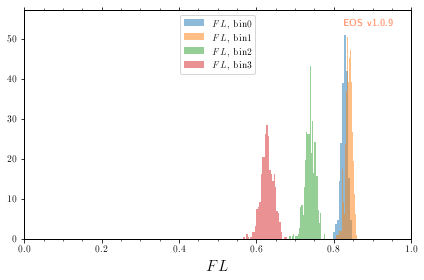

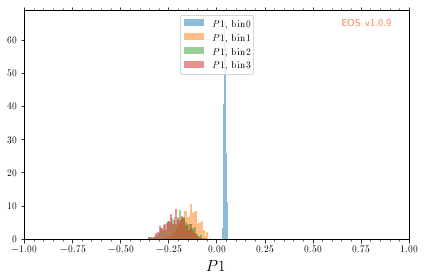

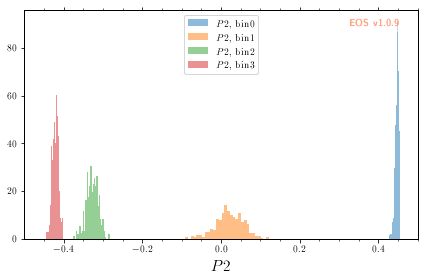

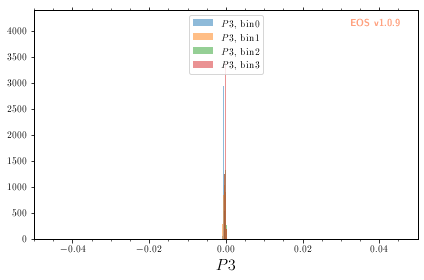

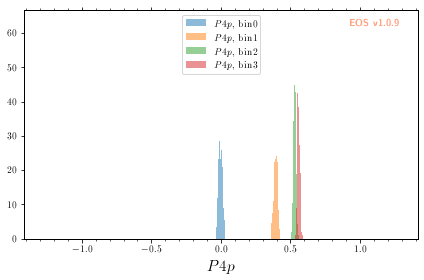

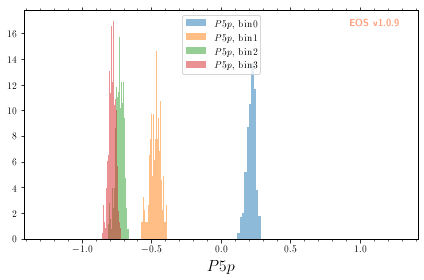

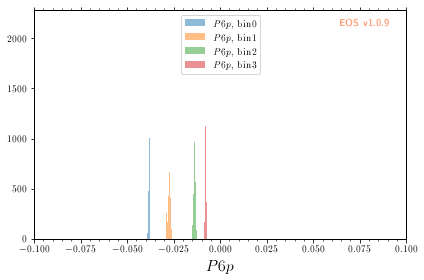

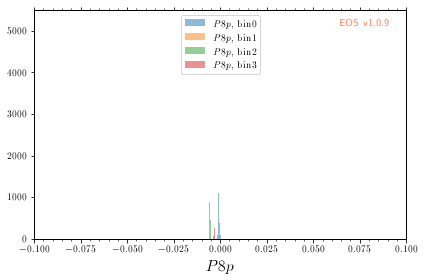

In [67]:
x_range_dict = {
    'FL': [0,1],
    'P1': [-1,1],
    'P2': [-0.5,0.5],
    'P3': [-0.05,0.05],
    'P4p': [-sqrt2,sqrt2],
    'P5p': [-sqrt2,sqrt2],
    'P6p': [-0.1,0.1],
    'P8p': [-0.1,0.1],
}

for i,ipar in enumerate(par_list):
  plot_args = {
     'plot': {
         'x': { 'label': r'$%s$'%ipar,  'range': [x_range_dict[ipar][0],  x_range_dict[ipar][1]] },
         'legend': { 'location': 'upper center' }
     },
     'contents': [
         { 'label': r'$%s$, bin0'%ipar,'type': 'histogram', 'bins': 10, 'data': { 'samples': obs_samples[i][:, 0] }},
         { 'label': r'$%s$, bin1'%ipar,'type': 'histogram', 'bins': 30, 'data': { 'samples': obs_samples[i][:, 1] }},
         { 'label': r'$%s$, bin2'%ipar,'type': 'histogram', 'bins': 30, 'data': { 'samples': obs_samples[i][:, 2] }},
         { 'label': r'$%s$, bin3'%ipar,'type': 'histogram', 'bins': 30, 'data': { 'samples': obs_samples[i][:, 3] }},
     ]
   }
  eos.plot.Plotter(plot_args).plot()

In [68]:
value_list = []
for j,ipar in enumerate(par_list):
    for i,q2 in enumerate(Fl_q2values[:-1]):
        mean=np.average(obs_samples[j][:,i])
        std=np.sqrt(np.var(obs_samples[j][:, i]))
        tmp_list = [ ipar,
                     mean,
                     std,
                     q2,
                     Fl_q2values[i+1],
                     np.where(Fl_q2values==q2)[0][0]                
                   ]
        value_list.append(tmp_list)

In [69]:
all_df = pd.DataFrame(value_list)
all_df.rename(columns={0 : 'parname', 
                   1 : 'value',\
                   2 : 'unc',\
                   3 : 'q2min',\
                   4 : 'q2max',\
                   5 : 'q2bin',\
                   }, inplace=True)    

In [70]:
all_df['q2'] = (all_df['q2max'] - all_df['q2min'])/2 + all_df['q2min']
all_df['q2err'] = (all_df['q2max'] - all_df['q2min'])/2

In [71]:
table = all_df.pivot(index=['q2min','q2max'], columns=['parname'], values=['value','unc'])

In [72]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def make_error_boxes( ax, xdata, ydata, xerror, yerror, facecolor='r',
                      edgecolor='None', alpha=0.5 ):

    # Loop over data points; create box from errors at each point
    errorboxes = [ Rectangle( (x-xe, y-ye), xe*2, ye*2 )
                   for x, y, xe, ye in zip(xdata, ydata, xerror, yerror) ]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)


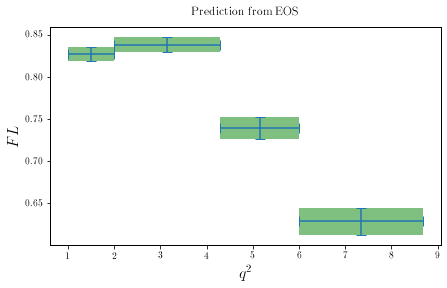

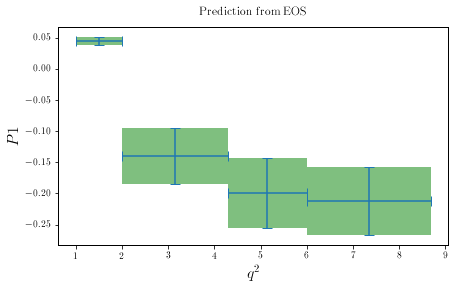

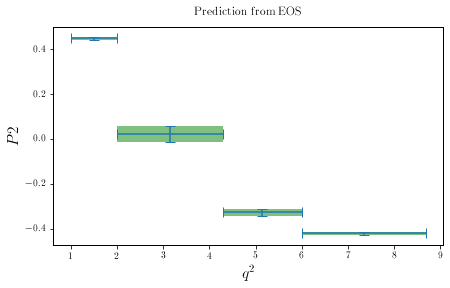

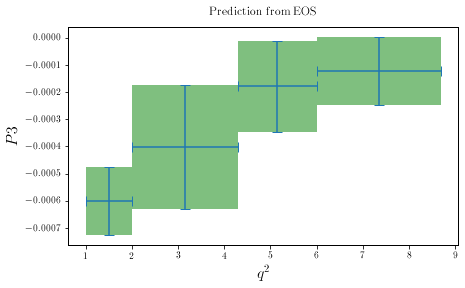

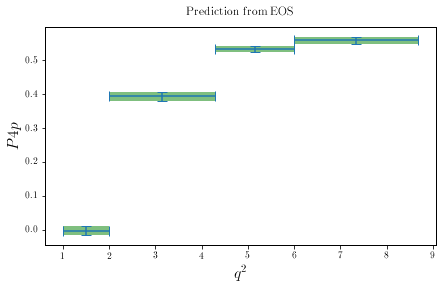

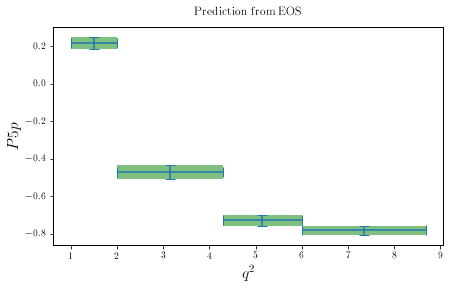

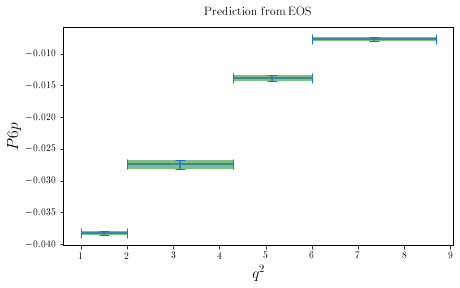

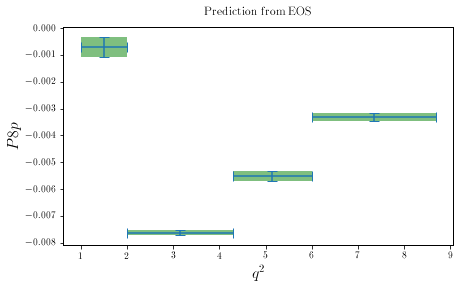

In [73]:
q2min = [item[0] for item in table.index.values]
q2max = [item[1] for item in table.index.values]
q2 = [(item[1] - item[0])/2 + item[0] for item in table.index.values]
q2err = [(item[1] - item[0])/2 for item in table.index.values]

x = q2
xerr = q2err

for j,ipar in enumerate(par_list):
    y = getattr(table.value, ipar)
    yerr = getattr(table.unc, ipar)

    fig, ax = plt.subplots(figsize=(7, 4))
    
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle='none')
    _ = make_error_boxes(ax, x, y, xerr, yerr,'g')
    
    ax.set_title('Prediction from EOS')
    ax.set_xlabel('$q^2$')
    ax.set_ylabel('$%s$'%ipar)
    plt.show()